In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

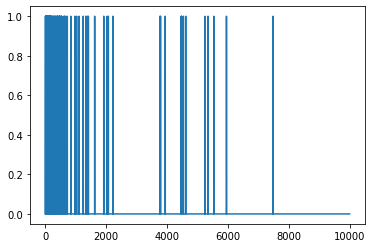

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 54s - loss: 0.4999 - accuracy: 0.7994 - binary_crossentropy: 0.4999 - val_loss: 0.3535 - val_accuracy: 0.8738 - val_binary_crossentropy: 0.3535
Epoch 2/20
25000/25000 - 24s - loss: 0.2632 - accuracy: 0.9084 - binary_crossentropy: 0.2632 - val_loss: 0.2864 - val_accuracy: 0.8890 - val_binary_crossentropy: 0.2864
Epoch 3/20
25000/25000 - 17s - loss: 0.1927 - accuracy: 0.9322 - binary_crossentropy: 0.1927 - val_loss: 0.2847 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2847
Epoch 4/20
25000/25000 - 13s - loss: 0.1552 - accuracy: 0.9474 - binary_crossentropy: 0.1552 - val_loss: 0.3017 - val_accuracy: 0.8807 - val_binary_crossentropy: 0.3017
Epoch 5/20
25000/25000 - 18s - loss: 0.1290 - accuracy: 0.9574 - binary_crossentropy: 0.1290 - val_loss: 0.3261 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3261
Epoch 6/20
25000/25000 - 14s - loss: 0.1099 - accuracy: 0.9646 - binary_crossentropy: 0.1099 - val_loss: 

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 56s - loss: 0.5679 - accuracy: 0.7668 - binary_crossentropy: 0.5679 - val_loss: 0.4553 - val_accuracy: 0.8557 - val_binary_crossentropy: 0.4553
Epoch 2/20
25000/25000 - 8s - loss: 0.3660 - accuracy: 0.8888 - binary_crossentropy: 0.3660 - val_loss: 0.3506 - val_accuracy: 0.8793 - val_binary_crossentropy: 0.3506
Epoch 3/20
25000/25000 - 8s - loss: 0.2793 - accuracy: 0.9108 - binary_crossentropy: 0.2793 - val_loss: 0.3109 - val_accuracy: 0.8841 - val_binary_crossentropy: 0.3109
Epoch 4/20
25000/25000 - 32s - loss: 0.2323 - accuracy: 0.9251 - binary_crossentropy: 0.2323 - val_loss: 0.2920 - val_accuracy: 0.8881 - val_binary_crossentropy: 0.2920
Epoch 5/20
25000/25000 - 72s - loss: 0.2017 - accuracy: 0.9337 - binary_crossentropy: 0.2017 - val_loss: 0.2851 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2851
Epoch 6/20
25000/25000 - 24s - loss: 0.1787 - accuracy: 0.9411 - binary_crossentropy: 0.1787 - val_loss: 0.

In [ ]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

In [ ]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [ ]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [ ]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

In [ ]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [ ]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [ ]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])